In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1.Titanic

   RMS Titanic was a British passenger liner, operated by the White Star Line, that sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England to New York City, United States. 
     Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship.The disaster drew public attention, provided foundational material for the disaster film genre, and has inspired many artistic works.

# 2.Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Models
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
#use sklearn.metrics.mean_squared_error() AND math.sqrt() to get RMSE
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
#set a random_state to be used in the notebook
random_state = 7

/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

# 3.Load dataset

In [4]:
train_df= pd.read_csv("/kaggle/input/titanic/train.csv")
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")

# 4.Basic EDA

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is null values in the age,cabin and enbarked .so that we need to remove that columns.

In [10]:
train=train_df.dropna(subset=['Age','Cabin','Embarked'])

In [11]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

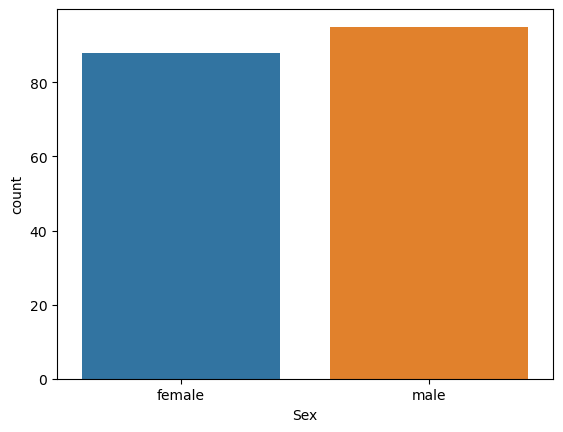

In [12]:
sns.countplot(x='Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

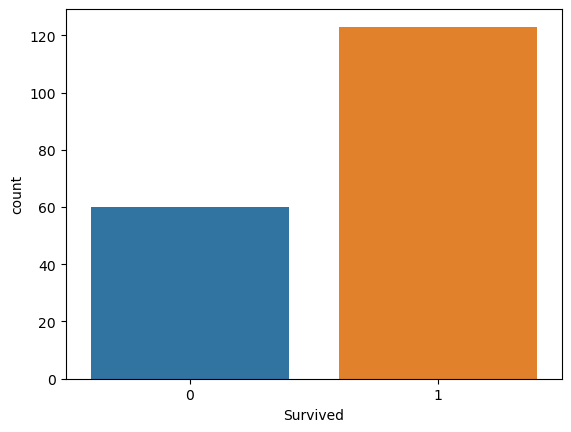

In [13]:
sns.countplot(x='Survived',data=train)

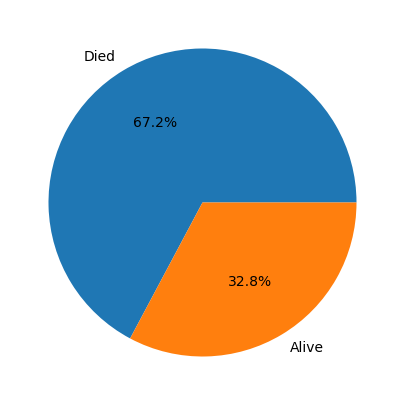

In [14]:
plt.subplots(figsize=(5,5))
plt.pie(train["Survived"].value_counts(),labels=["Died","Alive"],autopct="%1.1f%%")
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

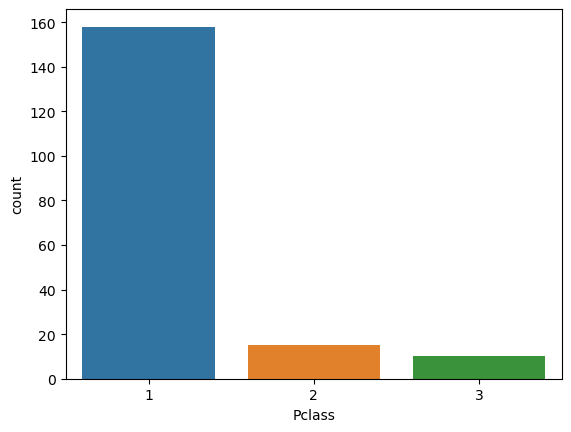

In [15]:
sns.countplot(x='Pclass',data=train)

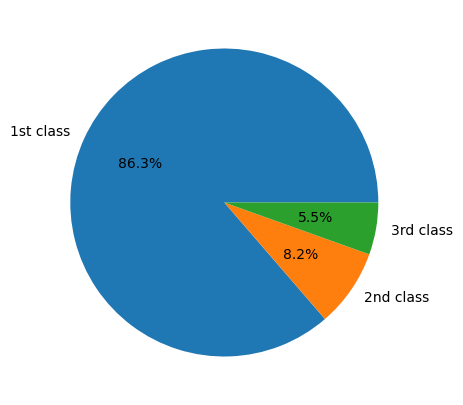

In [16]:
plt.subplots(figsize=(5,5))
plt.pie(train["Pclass"].value_counts(),labels=["1st class","2nd class","3rd class"],autopct="%1.1f%%")
plt.show()

# survived

**WOMEN**

In [17]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.9318181818181818


**men**

In [18]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.43157894736842106


We clearly now know that most of the women were survived from the titanic.

In [19]:

train_1=train.drop(['Name','Sex','Age','Cabin','Fare','Embarked','Ticket'],axis='columns')
train_1.head()

,PassengerId,Survived,Pclass,SibSp,Parch
1,2,1,1,1,0
3,4,1,1,1,0
6,7,0,1,0,0
10,11,1,3,1,1
11,12,1,1,0,0


# 5.Build the model

In [20]:
#select survived as target variable:
y = train_1['Survived']

#select all the other columns minus survived as the feature variables:
X = train_1.drop('Survived',axis=1)

In [21]:
#now make the train-test splits
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)
print('Dimensions: \n x_train:{} \n x_test{} \n y_train{} \n y_test{}'.format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

Dimensions: 
 x_train:(146, 4) 
 x_test(37, 4) 
 y_train(146,) 
 y_test(37,)


In [22]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
LogisticRegression()

LogisticRegression()

# 6.Evaluate the model

In [24]:
pred=model.predict(x_test)
pred[:5]

array([1, 1, 1, 0, 1])

In [25]:
y_test[:5]

139    0
558    1
449    1
136    1
779    1
Name: Survived, dtype: int64

In [26]:
confusion_matrix(pred,y_test)

array([[ 0,  2],
       [11, 24]])

In [27]:
accuracy_score(pred,y_test)

0.6486486486486487

In [28]:
precision_score(pred,y_test)

0.9230769230769231

# 7.predict on test data

In [29]:
test_df.shape

(418, 11)

In [30]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 7.Submission

In [31]:

test_values=test_df.drop(['Name','Sex','Age','Cabin','Embarked','Fare','Ticket'],axis='columns')
extracted_col = train["Survived"]
test_data= test_values.join(extracted_col)
test_values.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
dtype: int64

In [32]:
test_data_1= test_data.fillna(0)
test_data_1.head()

,PassengerId,Pclass,SibSp,Parch,Survived
0,892,3,0,0,0.0
1,893,3,1,0,1.0
2,894,2,0,0,0.0
3,895,3,0,0,1.0
4,896,3,1,1,0.0


In [33]:
predictions=model.predict(test_values)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [34]:
submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [35]:
submission['PassengerId']=test_df['PassengerId']
submission['Survived']=predictions

In [36]:
submission.shape

(418, 2)

In [37]:
submission.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


In [38]:
submission.tail()

,PassengerId,Survived
413,1305,1
414,1306,1
415,1307,1
416,1308,1
417,1309,1


In [39]:
submission['Survived'].value_counts()

1    418
Name: Survived, dtype: int64

In [40]:
submission.to_csv('submission.csv',index=False)

In [41]:
file=pd.read_csv('submission.csv')
file.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
